<u>**Définition**</u> : 

**API** (Application Programming Interface) : programme permettant à des applications de communiquer ensemble et echanger des données. 

<u>**Stratégie de collecte et API disponibles**</u> :

Nous utilisons RapidAPI pour consulter les API disponibles. 
Dans le cas de notre projet, l'idée pourrait être d'utiliser une API pour : 
- <u>Le traitement du langage naturel</u> (NLP)
- <u>L'analyse d'images</u>
- <u>La collecte de données</u> pour élargir la gamme de produits

API disponibles pour le traitement du langage naturel (NLP):
- NLP Translation : https://rapidapi.com/gofitech/api/nlp-translation/
- Twinword Text Analysis Bundle : https://rapidapi.com/twinword/api/twinword-text-analysis-bundle/
- Text Analysis : https://rapidapi.com/textanalysis/api/textanalysis/
- Summarize Texts : https://rapidapi.com/oneai-oneai-default/api/summarize-texts/
- WordWise : https://rapidapi.com/devapistry/api/wordwise3/

API disponibles pour l'analyse d'images : 
- Hydra AI : https://rapidapi.com/alessandro.lamberti98/api/hydra-ai/
- General Classification : https://rapidapi.com/api4ai-api4ai-default/api/general-classification1/
- Image Classification API : https://rapidapi.com/zyla-labs-zyla-labs-default/api/image-classification-api/
- Text and Image Similarity : https://rapidapi.com/andrefsr-XBzvELNE9uf/api/text-and-image-similarity/

API disponibles pour la collecte de données : 
- Ebay Data Scraper : https://rapidapi.com/augsmachado/api/ebay-data-scraper/
- Aliexpress DataHub : https://rapidapi.com/ecommdatahub/api/aliexpress-datahub/
- Amazon : https://rapidapi.com/restyler/api/amazon23/
- Edamam Food and Grocery Database API Documentation : https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

En l'occurrence, nous allons nous concentrer sur la dernière API afin d'élargir notre gamme de produits dans <u>l'épicerie fine</u>. 

<u>**Normes RGPD**</u>:

RGPD = Règlement Général sur la Protection des Données

Les 5 règles du RGPD consistent à : 
- Recueillir le consentement des personnes
- Respecter le principe de minimisation : données pertinentes et limitées
- Mettre en place et appliquer des durées de conservation : ne pas conserver les données de façon indéfinie
- Gérer les demandes d'exercice des droits des personnes concernées : respect des droits et libertés individuelles
- Respecter les principes de "privacy by design" et "privacy by default" : protection des données et conformité

# 1. Requête pour obtenir les données via l'API

In [221]:
import requests  # Permet de faire des requêtes web

# Adresse url + endpoint (spécifiques d'une API) contenant la liste de produits
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

querystring = {"page" : 59}

# Définition des en-têtes(clé API et hôte)
headers = {
    'x-rapidapi-key': "0111819927mshda28c349084fd23p1924f3jsn09219593f91a",
    'x-rapidapi-host': "edamam-food-and-grocery-database.p.rapidapi.com"
    }

# On affiche la réponse renvoyant le contenu dans un texte brut
response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"text":"","parsed":[],"hints":[{"food":{"foodId":"food_akub3p5bnht8t0bbqmx6oakjcxue","uri":"http://www.edamam.com/ontologies/edamam.owl#Food_05746","label":"Chicken, Broiler or Fryers, Breast, Skinless, Boneless, Meat Only, Cooked, Braised","knownAs":"Chicken, broiler or fryers, breast, skinless, boneless, meat only, cooked, braised","nutrients":{"ENERC_KCAL":157.0,"PROCNT":32.1,"FAT":3.24,"CHOCDF":0.0,"FIBTG":0.0},"category":"Generic foods","categoryLabel":"food","image":"https://www.edamam.com/food-img/e04/e042e7f11cca7ba5c4566dee3f46b343.jpg"},"measures":[{"uri":"http://www.edamam.com/ontologies/edamam.owl#Measure_unit","label":"Whole","weight":181.0},{"uri":"http://www.edamam.com/ontologies/edamam.owl#Measure_piece","label":"Piece","weight":181.0},{"uri":"http://www.edamam.com/ontologies/edamam.owl#Measure_gram","label":"Gram","weight":1.0},{"uri":"http://www.edamam.com/ontologies/edamam.owl#Measure_ounce","label":"Ounce","weight":28.349523125},{"uri":"http://www.edamam.com/ontolo

In [198]:
# Extraction du contenu de la réponse dans un dictionnaire
# Permet d'accéder plus facilement aux informations
data = response.json()
data

{'text': '',
 'parsed': [],
 'hints': [{'food': {'foodId': 'food_bwrgmmqau78xrdazxx79obeezumz',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_01001',
    'label': 'Butter, Salted',
    'knownAs': 'Butter, salted',
    'nutrients': {'ENERC_KCAL': 717.0,
     'PROCNT': 0.85,
     'FAT': 81.1,
     'CHOCDF': 0.06,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/515/515af390107678fce1533a31ee4cc35b.jpeg'},
   'measures': [{'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_tablespoon',
     'label': 'Tablespoon',
     'weight': 14.2},
    {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_cup',
     'label': 'Cup',
     'weight': 227.0},
    {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_stick',
     'label': 'Stick',
     'weight': 113.0},
    {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_gram',
     'label': 'Gram',
     'weight': 1.0},
    {'uri'

In [199]:
# On va compter le nombre de produits contenus dans notre variable
# Hints correspond à la clé contenant les produits et leurs informations

print(len(data['hints']), 'produits.')

20 produits.


In [200]:
# On affiche les clés se trouvant dans hints du premier produit
data['hints'][0].keys()

dict_keys(['food', 'measures'])

In [201]:
# On affiche les informations se trouvant dans la clé 'food' du premier produit
data['hints'][0]['food']

{'foodId': 'food_bwrgmmqau78xrdazxx79obeezumz',
 'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_01001',
 'label': 'Butter, Salted',
 'knownAs': 'Butter, salted',
 'nutrients': {'ENERC_KCAL': 717.0,
  'PROCNT': 0.85,
  'FAT': 81.1,
  'CHOCDF': 0.06,
  'FIBTG': 0.0},
 'category': 'Generic foods',
 'categoryLabel': 'food',
 'image': 'https://www.edamam.com/food-img/515/515af390107678fce1533a31ee4cc35b.jpeg'}

In [202]:
# On affiche les informations se trouvant dans la clé 'measures' du premier produit
data['hints'][0]['measures']

[{'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_tablespoon',
  'label': 'Tablespoon',
  'weight': 14.2},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_cup',
  'label': 'Cup',
  'weight': 227.0},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_stick',
  'label': 'Stick',
  'weight': 113.0},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_gram',
  'label': 'Gram',
  'weight': 1.0},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_ounce',
  'label': 'Ounce',
  'weight': 28.349523125},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_pound',
  'label': 'Pound',
  'weight': 453.59237},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_unit',
  'label': 'Whole',
  'weight': 113.0},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_pat',
  'label': 'Pat',
  'weight': 5.0},
 {'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_serving',
  'label': 'Serving',
  'weight': 14.0},
 {

In [203]:
# On récupère les seuls champs nécessaires (testons pour le premier produit)
champs = ['foodId', 'label', 'category', 'foodContentsLabel', 'image']

# On crée une variable représentant notre premier produit
product1 = data['hints'][0]['food']

for i in champs:
    if i in product1:
        print(i, 'présent dans notre produit')
    else:
        print(i, 'n\'est pas présent dans notre produit')

foodId présent dans notre produit
label présent dans notre produit
category présent dans notre produit
foodContentsLabel n'est pas présent dans notre produit
image présent dans notre produit


Sur les 5 champs nécessaires, nous observons que "foodContentsLabel" n'est pas présent dans notre produit. Peut-être est-il présent pour d'autres produits.

# 2. Application d'un filtre pour collecter les données contenant l'ingrédient "champagne"

On applique un filtre afin de ne sélectionner que les produits contenant l'ingrédient "champagne". 

In [223]:
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

querystring = {"ingr" : "champagne"}

headers = {
    "X-RapidAPI-Key": "0111819927mshda28c349084fd23p1924f3jsn09219593f91a",
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'text': 'champagne', 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu', 'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine', 'label': 'Champagne', 'knownAs': 'dry white wine', 'nutrients': {'ENERC_KCAL': 82.0, 'PROCNT': 0.07, 'FAT': 0.0, 'CHOCDF': 2.6, 'FIBTG': 0.0}, 'category': 'Generic foods', 'categoryLabel': 'food', 'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}], 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu', 'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine', 'label': 'Champagne', 'knownAs': 'dry white wine', 'nutrients': {'ENERC_KCAL': 82.0, 'PROCNT': 0.07, 'FAT': 0.0, 'CHOCDF': 2.6, 'FIBTG': 0.0}, 'category': 'Generic foods', 'categoryLabel': 'food', 'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}, 'measures': [{'uri': 'http://www.edamam.com/ontologies/edamam.owl#Measure_unit', 'label': 'Whole', 'weight': 750.0}, {'uri'

In [224]:
# Extraction du contenu de la réponse dans un dictionnaire
# Permet d'accéder plus facilement aux informations

data_champ = response.json()
data_champ

{'text': 'champagne',
 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}],
 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'},
   'measures': [{'uri': '

En regardant les différents produits filtrés selon l'ingrédient "champagne", on observe la présence, pour certains produits de "foodContentsLabel". 

In [225]:
# Liste des champs
champs = ['foodId', 'label', 'category', 'foodContentsLabel', 'image']

# Afficher les produits en filtrant les champs
if 'hints' in data_champ:
    for hint in data_champ['hints']:
        produit = hint['food']
        produit_filtre = {champ: produit[champ] for champ in champs if champ in produit}
        if len(produit_filtre) == len(champs):
            print(produit_filtre)
            print('------------')

{'foodId': 'food_b3dyababjo54xobm6r8jzbghjgqe', 'label': 'Champagne Vinaigrette, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINEGAR; SUGAR; OLIVE OIL; SALT; DRIED GARLIC; DRED SHALLOTS; BLACK PEPPER; XANTHAN GUM; SPICE', 'image': 'https://www.edamam.com/food-img/d88/d88b64d97349ed062368972113124e35.jpg'}
------------
{'foodId': 'food_bmu5dmkazwuvpaa5prh1daa8jxs0', 'label': 'Champagne Dressing, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFITES); WATER; WHITE WINE VINEGAR; SUGAR; SALT; SPICES (INCLUDING MUSTARD SEED); MONOSODIUM GLUTAMATE; GARLIC*; ONION*; XANTHAN GUM; MOLASSES; CALCIUM DISODIUM EDTA ADDED TO PROTECT FLAVOR; VINEGAR; CORN SYRUP; CARAMEL COLOR; CHIVES*; NATURAL FLAVOR; TAMARIND.', 'image': 'https://www.edamam.com/food-img/ab2/ab2459fc2a98cd35f68b848be2337ecb.jpg'}
------------
{'foodId': 'food_bu12urpbtuo9v6b4jpvk2a1fh4hh', 'label': 'Champagne Simp

Nous avons sélectionné, sur notre page 1, les produits pour lesquels nous avions des informations concernant les champs nécessaires. Nous allons sélectionner les 10 premiers produits pour lesquels nous détenons ces informations. Pour cela, nous allons **parcourir les premières pages**. 

In [266]:
# On regarde sur les 10 premières pages les produits
# contenant une information pour chaque champ
num_pages = range(0, 10)

for page in num_pages:
    print('Page :', page)
    
    # Paramètres de requête initiaux
    querystring = {"ingr": "champagne", "page": page}

    # On fait la requête à l'API avec les paramètres de requête actuels
    response = requests.get(url, headers=headers, params=querystring)
    data_champ = response.json()

    # On vérifie si des produits ont des informations pour chaque tous les champs dans la réponse
    if 'hints' in data_champ:
        produits_filtres = []
        for hint in data_champ['hints']:
            produit = hint['food']
            produit_filtre = {champ: produit[champ] for champ in champs if champ in produit}
            if len(produit_filtre) == len(champs):
                produits_filtres.append(produit_filtre)

        if produits_filtres:
            print('Produits présents')
            for produit_filtre in produits_filtres:
                print(produit_filtre)
                print('----------')
        else:
            print('Aucun produit correspondant aux critères')

Page : 0
Produits présents
{'foodId': 'food_b3dyababjo54xobm6r8jzbghjgqe', 'label': 'Champagne Vinaigrette, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINEGAR; SUGAR; OLIVE OIL; SALT; DRIED GARLIC; DRED SHALLOTS; BLACK PEPPER; XANTHAN GUM; SPICE', 'image': 'https://www.edamam.com/food-img/d88/d88b64d97349ed062368972113124e35.jpg'}
----------
{'foodId': 'food_bmu5dmkazwuvpaa5prh1daa8jxs0', 'label': 'Champagne Dressing, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFITES); WATER; WHITE WINE VINEGAR; SUGAR; SALT; SPICES (INCLUDING MUSTARD SEED); MONOSODIUM GLUTAMATE; GARLIC*; ONION*; XANTHAN GUM; MOLASSES; CALCIUM DISODIUM EDTA ADDED TO PROTECT FLAVOR; VINEGAR; CORN SYRUP; CARAMEL COLOR; CHIVES*; NATURAL FLAVOR; TAMARIND.', 'image': 'https://www.edamam.com/food-img/ab2/ab2459fc2a98cd35f68b848be2337ecb.jpg'}
----------
{'foodId': 'food_bu12urpbtuo9v6b4jpvk2a1fh4hh', '

On cherche à ne conserver que les **15 premiers produits** contenant les informations pour les données **"foodId", "label", "category", "foodContentsLabel" et "image" à base de "champagne"**. 

In [278]:
num_pages = range(0, 15)
produits_recuperes = []  # Variable pour stocker les produits récupérés

# Variable pour suivre le nombre de produits récupérés
nombre_produits_recupere = 0

for page in num_pages:
    print('Page :', page)
    
    # Paramètres de requête initiaux
    querystring = {"ingr": "champagne", "page": page}

    # Faire la requête à l'API avec les paramètres de requête actuels
    response = requests.get(url, headers=headers, params=querystring)
    data_champ = response.json()

    # Vérifier si des produits sont présents dans la réponse
    if 'hints' in data_champ:
        produits_filtres = []
        for hint in data_champ['hints']:
            produit = hint['food']
            produit_filtre = {champ: produit[champ] for champ in champs if champ in produit}
            if len(produit_filtre) == len(champs):
                produits_filtres.append(produit_filtre)

                # Vérifier si le nombre de produits récupérés atteint 10
                nombre_produits_recupere += 1
                if nombre_produits_recupere == 15:
                    break

        if produits_filtres:
            print('Produits présents')
            for produit_filtre in produits_filtres:
                print(produit_filtre)
                print('----------')
                produits_recuperes.append(produit_filtre)  # Ajouter le produit à la liste des produits récupérés

        else:
            print('Aucun produit correspondant aux critères')

        # Vérifier si le nombre de produits récupérés atteint 10
        if nombre_produits_recupere == 15:
            break


Page : 0
Produits présents
{'foodId': 'food_b3dyababjo54xobm6r8jzbghjgqe', 'label': 'Champagne Vinaigrette, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINEGAR; SUGAR; OLIVE OIL; SALT; DRIED GARLIC; DRED SHALLOTS; BLACK PEPPER; XANTHAN GUM; SPICE', 'image': 'https://www.edamam.com/food-img/d88/d88b64d97349ed062368972113124e35.jpg'}
----------
{'foodId': 'food_bmu5dmkazwuvpaa5prh1daa8jxs0', 'label': 'Champagne Dressing, Champagne', 'category': 'Packaged foods', 'foodContentsLabel': 'SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFITES); WATER; WHITE WINE VINEGAR; SUGAR; SALT; SPICES (INCLUDING MUSTARD SEED); MONOSODIUM GLUTAMATE; GARLIC*; ONION*; XANTHAN GUM; MOLASSES; CALCIUM DISODIUM EDTA ADDED TO PROTECT FLAVOR; VINEGAR; CORN SYRUP; CARAMEL COLOR; CHIVES*; NATURAL FLAVOR; TAMARIND.', 'image': 'https://www.edamam.com/food-img/ab2/ab2459fc2a98cd35f68b848be2337ecb.jpg'}
----------
{'foodId': 'food_bu12urpbtuo9v6b4jpvk2a1fh4hh', '

# 3. Enregistrement dans un fichier .csv

In [279]:
# On créer notre fichier .csv
nom_data = "api_filtre_champ.csv"

In [280]:
import pandas as pd
import csv

# On ouvre le fichier CSV en mode écriture
with open(nom_data, 'w', newline='') as data_csv:
    # On crée un objet writer CSV contenant les informations 
    # et en spécifiant le nom des champs
    writer = csv.DictWriter(data_csv, fieldnames=champs)

    # On écrit les en-têtes de colonnes dans le fichier CSV
    writer.writeheader()

    # On écrit les enregistrements dans le fichier CSV
    for produits in produits_recuperes:
        writer.writerow(produits)

In [281]:
# On ouvre notre fichier .csv 
api_data = pd.read_csv('api_filtre_champ.csv', sep=',')
api_data

,foodId,label,category,foodContentsLabel,image
0,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
1,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
2,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...,https://www.edamam.com/food-img/736/736a3e27a6...
3,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...,https://www.edamam.com/food-img/736/736a3e27a6...
4,food_b48c55sagj89z4afsne5dar76h4x,Champagne Vinegar,Packaged foods,CHAMPAGNE VINEGAR DILUTED WITH WATER TO 7% ACI...,https://www.edamam.com/food-img/ad8/ad8c8d6ba8...
5,food_bb0nrsgbser5g4ac2enxib1deyh8,Champagne Mustard,Packaged foods,DIJON MUSTARD (VINEGAR; WATER; MUSTARD SEED; S...,https://www.edamam.com/food-img/775/775b39c0b0...
6,food_arm1rlyb5v81v6arurmjqb6xiy9t,"Light Champagne Dressing, Light Champagne",Packaged foods,WATER; SOYBEAN OIL; WHITE WINE (PRESERVED WITH...,https://www.edamam.com/food-img/ee0/ee0475f45b...
7,food_bzb3i0lbxkz4nnbv10dsladd965e,Inglenook Champagne,Packaged foods,Dealcoholized Champagne; Water; Grape Juice Co...,https://www.edamam.com/food-img/cb3/cb33b008db...
8,food_byl67wcbbfw82ua6j1n7oa6ago4a,Cola Champagne,Packaged foods,CARBONATED WATER; HIGH FRUCTOSE CORN SYRUP; AR...,https://www.edamam.com/food-img/f82/f82d164536...
9,food_b3iaz2gav39j6abdpavjka0qgz2e,Cola Champagne,Packaged foods,CARBONATED WATER; HIGH FRUCTOSE CORN SYRUP; AR...,https://www.edamam.com/food-img/b4b/b4b747a25b...


In [287]:
# On regarde les doublons
display(api_data.loc[api_data.duplicated(), :])

# On supprime le doublon
api_data = api_data.drop_duplicates()

,foodId,label,category,foodContentsLabel,image
3,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...,https://www.edamam.com/food-img/736/736a3e27a6...


In [293]:
# On sélectionne les 10 premiers
api_data_10 = api_data.iloc[0:10, :]
api_data_10

,foodId,label,category,foodContentsLabel,image
0,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
1,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
2,food_bu12urpbtuo9v6b4jpvk2a1fh4hh,"Champagne Simply Dressed Vinaigrette, Champagne",Packaged foods,FILTERED WATER; CANOLA OIL; CHAMPAGNE AND WHIT...,https://www.edamam.com/food-img/736/736a3e27a6...
4,food_b48c55sagj89z4afsne5dar76h4x,Champagne Vinegar,Packaged foods,CHAMPAGNE VINEGAR DILUTED WITH WATER TO 7% ACI...,https://www.edamam.com/food-img/ad8/ad8c8d6ba8...
5,food_bb0nrsgbser5g4ac2enxib1deyh8,Champagne Mustard,Packaged foods,DIJON MUSTARD (VINEGAR; WATER; MUSTARD SEED; S...,https://www.edamam.com/food-img/775/775b39c0b0...
6,food_arm1rlyb5v81v6arurmjqb6xiy9t,"Light Champagne Dressing, Light Champagne",Packaged foods,WATER; SOYBEAN OIL; WHITE WINE (PRESERVED WITH...,https://www.edamam.com/food-img/ee0/ee0475f45b...
7,food_bzb3i0lbxkz4nnbv10dsladd965e,Inglenook Champagne,Packaged foods,Dealcoholized Champagne; Water; Grape Juice Co...,https://www.edamam.com/food-img/cb3/cb33b008db...
8,food_byl67wcbbfw82ua6j1n7oa6ago4a,Cola Champagne,Packaged foods,CARBONATED WATER; HIGH FRUCTOSE CORN SYRUP; AR...,https://www.edamam.com/food-img/f82/f82d164536...
9,food_b3iaz2gav39j6abdpavjka0qgz2e,Cola Champagne,Packaged foods,CARBONATED WATER; HIGH FRUCTOSE CORN SYRUP; AR...,https://www.edamam.com/food-img/b4b/b4b747a25b...
10,food_bsck64rasshe3aag46w4dbq3ip81,Champagne Reserve Vinegar,Packaged foods,CHAMPAGNE VINEGAR,https://www.edamam.com/food-img/d2d/d2dcfa4b43...


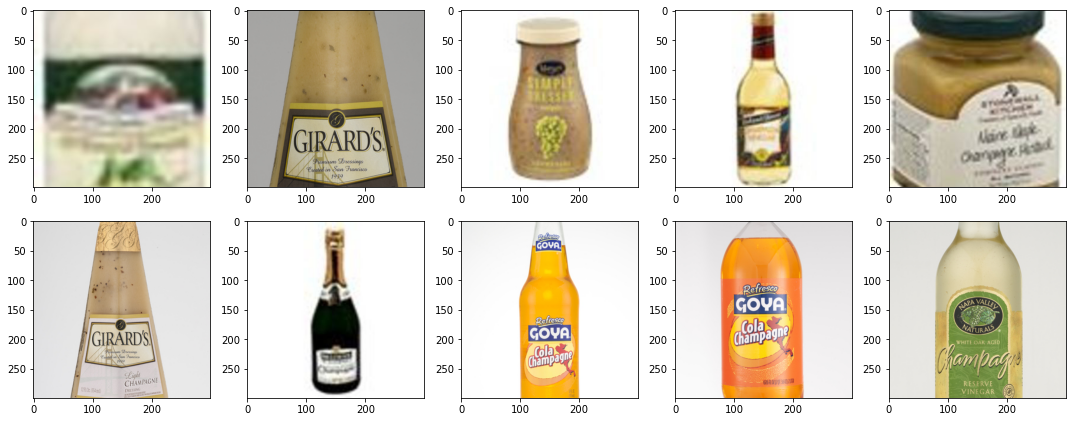

In [296]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

# Fonction pour charger et afficher une image à partir d'un lien
def afficher_image(lien_image, ax):
    try:
        with urllib.request.urlopen(lien_image) as url:
            img = Image.open(url)
            ax.imshow(img)
            ax.axis('on')
    except:
        print("Erreur lors du chargement de l'image")

# Créer une grille de sous-graphiques
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Itérer sur les images et les afficher dans les sous-graphiques correspondants
for i, ax in enumerate(axs.flat):
    if i < len(api_data_10):
        lien_image = api_data_10.iloc[i]['image']
        afficher_image(lien_image, ax)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()